<a href="https://www.kaggle.com/code/rohit848/weatheraus?scriptVersionId=115558756" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Training a Logistic Regression Model

Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model: 

- we take linear combination (or weighted sum of the input features) 
- we apply the sigmoid function to the result to obtain a number between 0 and 1
- this number represents the probability of the input being classified as "Yes"
- instead of RMSE, the cross entropy loss function is used to evaluate the results


Here's a visual summary of how a logistic regression model is structured ([source](http://datahacker.rs/005-pytorch-logistic-regression-in-pytorch/)):



The sigmoid function applied to the linear combination of inputs has the following formula:

<img src="https://i.imgur.com/sAVwvZP.png" width="400">

To train a logistic regression model, we can use the `LogisticRegression` class from Scikit-learn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv")

In [3]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes('object').columns.tolist()

In [6]:
from sklearn.impute import SimpleImputer

In [7]:
imputer = SimpleImputer(strategy = 'mean')

In [8]:
df[numeric_cols].isna().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

In [9]:
imputer.fit(df[numeric_cols])

SimpleImputer()

In [10]:
df[numeric_cols] = imputer.transform(df[numeric_cols])

In [11]:
df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

## Encoding Categorical Data

In [12]:
df[categorical_cols].nunique()

Date            3436
Location          49
WindGustDir       16
WindDir9am        16
WindDir3pm        16
RainToday          2
RainTomorrow       2
dtype: int64

In [13]:
#from sklearn.preprocessing import OneHotEncoder

In [14]:
#?OneHotEncoder

In [15]:
#encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
#encoder.fit(df[categorical_cols])
#encoded_cols = list(encoder.get_feature_names(categorical_cols))
#df[encoded_cols] = encoder.transform(df[categorical_cols])

In [16]:
df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

In [17]:
df = df.dropna()

In [18]:
a = df.isnull().sum()
a.head(23)

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [19]:
dfv = df

In [20]:
df.describe(include = "all")

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,123710,123710,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710,123710.000000,123710,...,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710.000000,123710,123710
unique,3417,47,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,2013-10-16,Darwin,NaN,NaN,NaN,NaN,NaN,W,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,47,3119,NaN,NaN,NaN,NaN,NaN,9177,NaN,10763,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95954,96318
mean,NaN,NaN,12.413917,23.474808,2.375661,5.551665,7.669315,NaN,40.685280,NaN,...,67.664315,50.856904,1017.416706,1015.029505,4.422374,4.498630,17.268860,21.895705,NaN,NaN
std,NaN,NaN,6.366792,7.205898,8.528039,3.245612,2.782271,NaN,13.388636,NaN,...,18.975503,20.839568,6.765690,6.703817,2.280965,2.124822,6.477882,7.005865,NaN,NaN
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,7.000000,NaN,...,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,NaN,NaN
25%,NaN,NaN,7.800000,18.100000,0.000000,4.200000,7.611178,NaN,31.000000,NaN,...,56.000000,36.000000,1013.200000,1010.700000,3.000000,4.000000,12.500000,16.800000,NaN,NaN
50%,NaN,NaN,12.200000,23.000000,0.000000,5.468232,7.611178,NaN,39.000000,NaN,...,68.880831,51.539116,1017.649940,1015.255889,4.447461,4.509930,16.990631,21.500000,NaN,NaN
75%,NaN,NaN,17.000000,28.600000,0.800000,5.600000,9.000000,NaN,48.000000,NaN,...,81.000000,65.000000,1021.700000,1019.300000,6.000000,6.000000,21.900000,26.700000,NaN,NaN


### Data normalization
​
*  Normalization refers to rescaling real-valued numeric attributes into a 0 to 1 range
​
*  Convert categorical to numeric using pandas

In [21]:
loc = df.Location.unique()
loc.sort() 
loc

array(['Adelaide', 'Albury', 'AliceSprings', 'BadgerysCreek', 'Ballarat',
       'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
       'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
       'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
       'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Nhil',
       'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF', 'Penrith',
       'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
       'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
       'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
       'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
      dtype=object)

In [22]:
df = df.replace(to_replace=['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
       'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
       'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
       'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
       'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
       'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
       'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
       'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
       'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
       'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
           value=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19',
          '20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39',
          '40','41','42','43','44','45','46','47','48','49'])

In [23]:
wd = df.WindDir9am.unique()
wd.sort()
wd

array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW'], dtype=object)

In [24]:
df = df.replace(to_replace=['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW'],
                value=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16'])

In [25]:
df = df.replace(to_replace=['Yes', 'No'],
                            value=['1','0'])

## Train Test Split

<AxesSubplot:xlabel='Date', ylabel='count'>

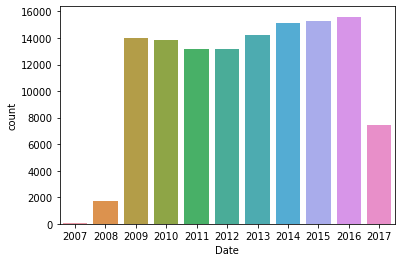

In [26]:
year = pd.to_datetime(df.Date).dt.year
sns.countplot(x = year)

In [27]:
train_df = df[year < 2015]
val_df = df[year == 2015]
test_df = df[year > 2015]

In [28]:
train_df = train_df[['Location','MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday']]
val_df = val_df[['Location','MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday']]
train_df = test_df[['Location','MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday']]


## Data visualization

In [29]:
px.histogram(dfv,x = "RainToday",
             color = "RainToday",
            color_discrete_sequence = ("red","green"))

In [30]:
px.histogram(dfv, x='Location', title='Location vs. Rainy Days', color='RainToday')

In [31]:
px.histogram(dfv, 
             x='Temp3pm', 
             title='Temperature at 3 pm vs. Rain Tomorrow', 
             color='RainTomorrow')

In [32]:
px.scatter(dfv.sample(2000), 
           title='Min Temp. vs Max Temp.',
           x='MinTemp', 
           y='MaxTemp', 
           color='RainToday')

In [33]:
corr = df.corr()

In [34]:
px.imshow(corr)

# Training a Logistic Regression Model

In [35]:
from sklearn import linear_model

In [36]:
model = linear_model.LogisticRegression()

In [37]:
x = np.array(train_df[['Location','MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']])
y = np.array(train_df['RainToday'])

x_test = np.array(test_df[['Location','MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']])
y_test = np.array(test_df['RainToday'])


In [38]:
model.fit(x,y)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [39]:
predict = model.predict(x_test)

In [40]:
pd.DataFrame(predict)

,0
0,0
1,1
2,1
3,1
4,0
...,...
23009,0
23010,0
23011,0
23012,0


## Prediction on New Inputs

new_input =  model.predict(np.array([[

'Location': 'Launceston',

'MinTemp': 23.2,

'MaxTemp': 33.2,

'Rainfall': 10.2,

'Evaporation': 4.2,

'Sunshine': 10,

'WindGustDir': 'NNW',

'WindGustSpeed': 52.0,

'WindDir9am': 'NW',

'WindDir3pm': 'NNE',

'WindSpeed9am': 13.0,

'WindSpeed3pm': 20.0,

'Humidity9am': 89.0,

'Humidity3pm': 58.0,

'Pressure9am': 1004.8,

'Pressure3pm': 1001.5,

'Cloud9am': 8.0,

'Cloud3pm': 5.0,

'Temp9am': 25.7,

'Temp3pm': 33.0,]]))


In [41]:
new_input = model.predict(np.array([["3","18.4","23.6","2.2","5.468232","7.611178","11","50.0","11","10","9.0","17.0","54.0","30.0","1011.1","1008.4","8.0","8.0","21.8","19.5"]]))
new_input = int (new_input)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:566: FutureWarning:

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.



In [42]:
if new_input == 1:
    print("RAIN ϟ ☁ ☂")
else:
    print("SUNNY")

RAIN ϟ ☁ ☂
